**Machine Learning Assigment 3 : Predictive Modeling for Insurance Claims**

**NAME: Barbra Lakot**

**REGESTRATION NO: 2023/HD05/04677U**

**STUDENT NO: 2300704677**  

**Objective:**

Build a predictive model to determine if a building will have an insurance claim during a specific
period using building characteristics. In this assignment, you will explore and apply four
machine learning algorithms: Support Vector Machine (SVM), Linear Regression, k-nearest
Neighbors (KNN), and Naive Bayes. The evaluation metric for this assignment is the Area Under
the Curve (AUC).


**Variable Description**

Customer Id Identification number for the Policy holder
YearOfObservation year of observation for the insured policy
Insured_Period duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5
Residential is the building a residential building or not
Building_Painted is the building painted or not (N-Painted, V-Not Painted)
Building_Fenced is the building fence or not (N-Fenced, V-Not Fenced)
Garden building has garden or not (V-has garden O-no garden) Settlement Area where the building is located. (R- rural area U- urban area) Building Dimension Size of the insured building in m2
Building_Type The type of building (Type 1, 2, 3, 4)
Date_of_Occupancy date building was first occupied
NumberOfWindows number of windows in the building
Geo Code Geographical Code of the Insured building
Claim target variable. (0: no claim, 1: at least one claim over insured period).

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
#Importing important libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
#loading the training dataset
df1 = pd.read_csv('/content/drive/MyDrive/dataset/train_data.csv')

In [179]:
#viewing the first five rows of the dataset
df1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [180]:
#displaying the shape of the dataset
df1.shape

(7160, 14)

The dataset has 7160 rows and 14 columns

In [181]:
#displaying the columns in the dataset
df1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [182]:
#displaying the datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


This shows that out of the 14 columns, 3 contains float datatype, 4 has integer and 7 columns conatin strings as a datatype and that means there need for encoding the categorical variables

In [183]:
#displaying basic key statistics
df1.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [184]:
#displaying basic key statistics
df1.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7153,7160,7160,7058
unique,7160,2,2,2,2,11,1307
top,H14663,V,N,O,R,.,6088
freq,1,5382,3608,3602,3610,3551,143


In [185]:
#checking for missing values in the dataset
df1.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

The variable Garden has 7 missing values, Building Dimension has 106, Date_of_occupancy has 508 and Geo_code has 102 missing values.


In [186]:
#Handling the missing values using imputation since the dataset is small
#we shall use the median for numerical and mode for categorical variables for filling the missing values
df1 = df1
df1['Building Dimension']=df1['Building Dimension'].fillna(df1['Building Dimension'].median())
df1['Date_of_Occupancy']=df1['Date_of_Occupancy'].fillna(df1['Date_of_Occupancy'].median())
df1['Garden']=df1['Garden'].fillna(df1['Garden'].mode().iloc[0])
df1['Geo_Code'] = df1['Geo_Code'].fillna(df1['Geo_Code'].mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


This shows that all the missing values have been handled since all variables have total count of 7160

## **Distribution of the train data**

In [187]:
df1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [188]:
#displaying the statistics of Building dimension
df1['Building Dimension'].describe()

count     7160.000000
mean      1871.873184
std       2263.296186
min          1.000000
25%        531.500000
50%       1083.000000
75%       2250.000000
max      20940.000000
Name: Building Dimension, dtype: float64

 The Building Dimension column has outliers. For example, the max_amount is 20940.000000,while its mean is  1.000000. The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier.

In [189]:
#create a histogram to visualize the outliers in Building Dimension
import plotly.express as px
fig = px.histogram(df1, x='Building Dimension')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension')
fig.show()



Notice the data does not follow a normal distribution. Since the data is skewed

In [190]:
#create a box plot to visualize the outlier in the Building Dimension
fig = px.box(df1, y='Building Dimension')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension')
fig.show()

Above the box and upper fence are some points showing outliers

**Handling Outlier by cap method**

In [191]:
#To cap the outliers, calculate a upper limit and lower limit.
upper_limit = df1['Building Dimension'].mean() + 0.7*df1['Building Dimension'].std()
lower_limit = df1['Building Dimension'].mean() - 0.7*df1['Building Dimension'].std()
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 3456.1805144593
Lower_limit: 287.56585425578396


In [192]:
import numpy as np
#we use the numpy .where() function to apply the limits to Building Dimension.
df1['Building Dimension'] = np.where(df1['Building Dimension'] > upper_limit,upper_limit,
np.where(df1['Building Dimension'] < lower_limit,lower_limit,df1['Building Dimension']))

In [193]:
#displaying the the statistics of Building Dimension
df1.describe()[['Building Dimension']]

,Building Dimension
count,7160.000000
mean,1480.977883
std,1109.388848
min,287.565854
25%,531.500000
50%,1083.000000
75%,2250.000000
max,3456.180514


The max value is has been reduced to 3456.180514 and min value has raised to 287.565854, and the mean value is now 1480.977883. This means the outlier has been delt with.

In [194]:
fig = px.histogram(df1, x='Building Dimension')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension without outliers')
fig.show()

In [195]:
#create a box plot to visualize the outlier in the Building Dimension
fig = px.box(df1, y='Building Dimension')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension without outliers')
fig.show()

# **Distribution of target variable_Claim**

In [196]:
# distribution of the target variable
df1["Claim"].unique()
df1["Claim"].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

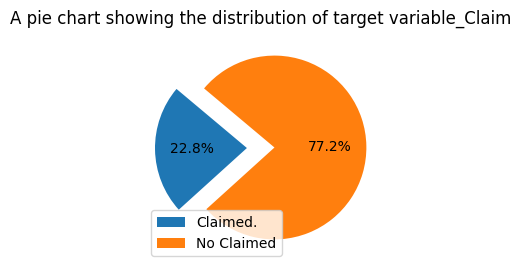

In [197]:
# Sample data (replace with your actual data)
plt.figure(figsize=(3, 3))
labels = ['Claimed.', 'No Claimed']
values = [df1["Claim"].sum(), len(df1) - df1["Claim"].sum()]
# Create a pie chart with labeled segments
plt.pie(values, autopct='%1.1f%%', startangle=140,explode=[0.3,0])
plt.title("A pie chart showing the distribution of target variable_Claim")

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.legend(labels=labels, loc='lower left')
plt.show()

This means 22.8% of the building has atleast one claim over the insured period and 77.2% have no claim over the insured period.The target variable seems to be imbalance

# **Distribution of the target variable with repect to categorical variables in the dataset**

<Figure size 640x480 with 0 Axes>

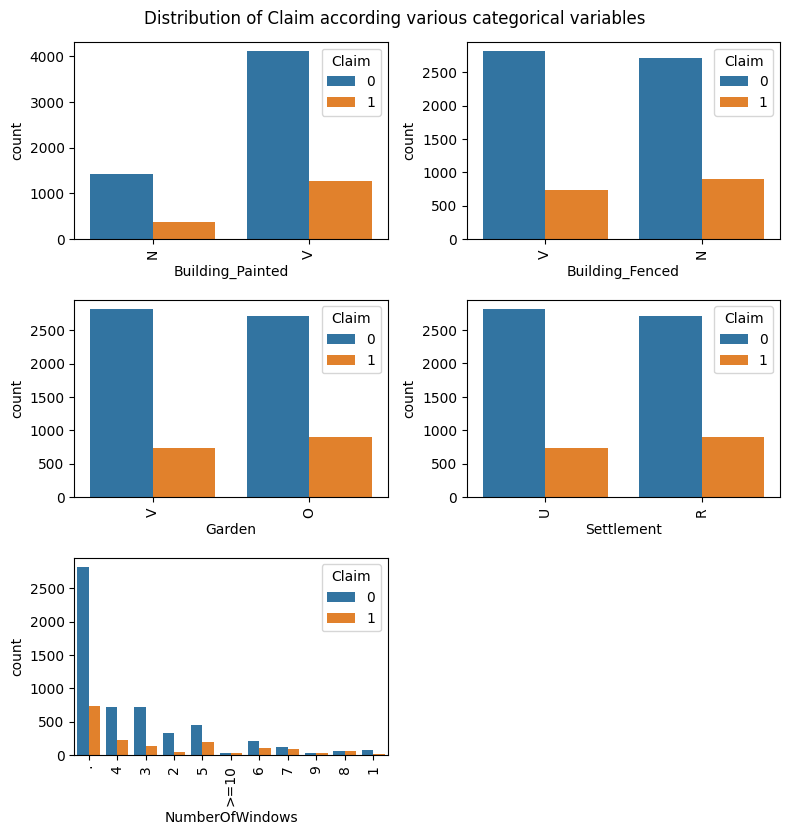

In [199]:
Categ_var=['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']
list(enumerate(Categ_var))
plt.suptitle("Distribution of Claim according various categorical variables")
plt.figure(figsize=(8,8))
for i in enumerate(Categ_var):
 plt.subplot(3,2,i[0]+1)
 plt.tight_layout()
 plt.suptitle("Distribution of Claim according various categorical variables")
 sns.countplot(x=i[1], hue ='Claim', data = df1)
 plt.xticks(rotation = 90)

**Observation**
1. The non painted buildings have a higher insurance claim campared to the painted houses for the first bar graph
2. The non fensed buildings have a higher insurance claim campared to the fensed houses
3. The buildings without gardens a higher insurance claim campared to those buildings with gardens
4. Buildings in the Urban Settlement have a low insurance claim  as     compared to those in rural setting



# **Visualisation of outliers in the date of occupancy variable**



In [200]:
# Visualisation of outliers in the date of occupancy variable
def plot_variable(df,variable):
  plt.figure(figsize = (10,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

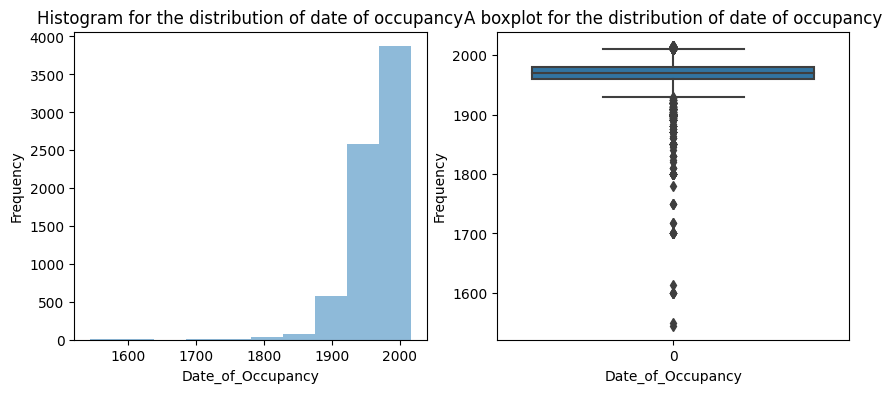

In [24]:
plot_variable(df1,'Date_of_Occupancy')

In [201]:
# using the Z score method to deal with outliers in  the Date_of_Occupancy variable
upper_limit = df1['Date_of_Occupancy'].mean() + 2.5*df1['Date_of_Occupancy'].std()
lower_limit = df1['Date_of_Occupancy'].mean() - 2.5*df1['Date_of_Occupancy'].std()

In [202]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 2051.6755879533193
Lower_limit: 1878.0238533874629


In [203]:
# we r going to trim the outliers
dfn = df1.loc[(df1['Date_of_Occupancy']<upper_limit) & (df1['Date_of_Occupancy']>lower_limit)]
print('old dataframe:',len(df1))
print('new dataframe:',len(dfn))
print('outliers:',len(df1)-len(df1))

old dataframe: 7160
new dataframe: 7025
outliers: 0


In [204]:
def plot_variable(df,variable):
  plt.figure(figsize = (10,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

**Visualisation the date of occupancy variable without the outliers**

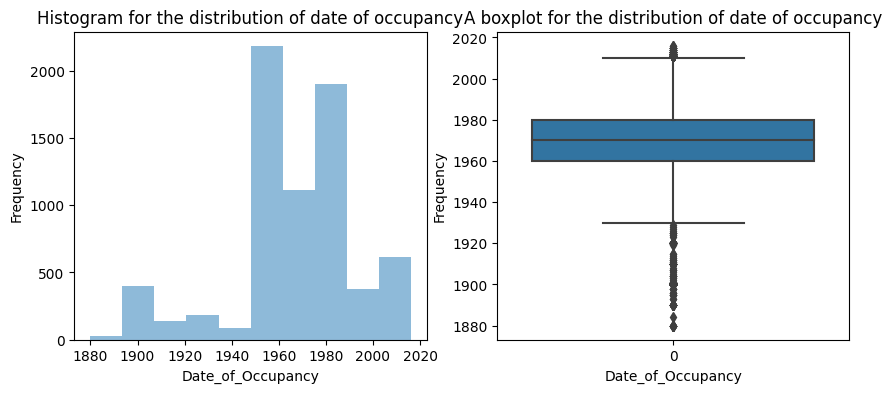

In [205]:
plot_variable(dfn,'Date_of_Occupancy')

# **Distribution of target variable with repect to Numerical variables**

In [207]:
df1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [208]:
figure10=['Residential','Building Dimension','Building_Type','Date_of_Occupancy',]

In [209]:
list(enumerate(figure10))

[(0, 'Residential'),
 (1, 'Building Dimension'),
 (2, 'Building_Type'),
 (3, 'Date_of_Occupancy')]

In [210]:
df1["Residential"].unique()

array([0, 1])

<Figure size 640x480 with 0 Axes>

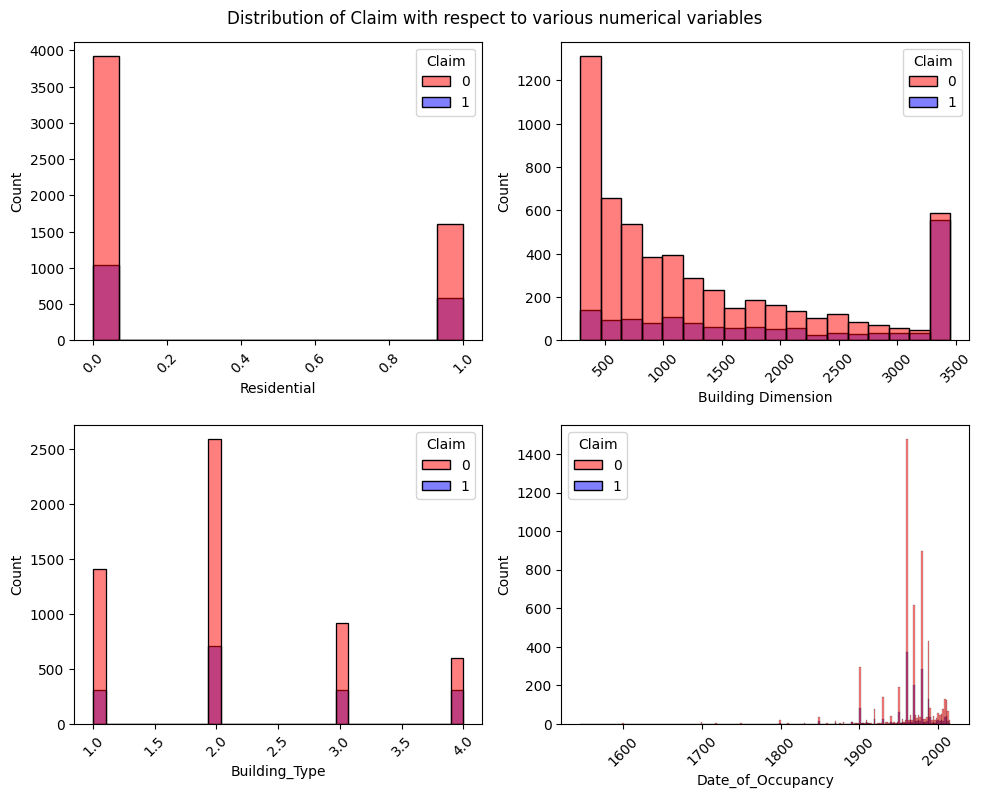

In [211]:
plt.suptitle("Distribution of Claim with respect to various numerical variables")
plt.figure(figsize=(10,8))
for i in enumerate(figure10):
  plt.subplot(2,2,i[0]+1)
  plt.suptitle("Distribution of Claim with respect to various numerical variables")
  plt.tight_layout()
  sns.histplot(x=i[1], hue ='Claim', data = df1, palette=['red','blue'])
  plt.xticks(rotation = 45)

**Observation**

There was a high insurance claim in the year 1960 according to Date of occupancy bar graph.

Buildings of dimensions between 500 to 2000 have a higher insurance claim

Non residential buildings have a higer insurance claim claim as compared to the residential buildings

Buildings with type number 2 have a hot a higher insurance claim as opposed to other number types

**Label encoding**

In [212]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement","NumberOfWindows",]
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])
    print(df1)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

      Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                    0               V      V          U               290.0   
1                    1 

In [213]:
#displaying the encoded dataset
df1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,1053,0


**Feature Selections**

In [37]:
columns_to_drop = ['Customer Id','NumberOfWindows','Geo_Code']
df1 = df1.drop(columns=columns_to_drop, axis=1)

In [38]:
#Specification of independent and dependent variables of dataset 1
X = df1.drop(columns=['Claim'])  # Features
y = df1['Claim']  # Target variable

In [39]:
# Calculate chi-squared statistics for each feature
from sklearn.feature_selection import chi2
chi2_scores = chi2(X, y)
chi2_scores

(array([1.82353700e-03, 3.56003125e+00, 2.00580781e+01, 1.58496437e+00,
        9.62777976e+00, 9.82298289e+00, 9.76861699e+00, 5.21960928e+05,
        3.64560796e+01, 1.38953369e+00]),
 array([9.65938374e-01, 5.91866246e-02, 7.51255220e-06, 2.08047062e-01,
        1.91656154e-03, 1.72344606e-03, 1.77515936e-03, 0.00000000e+00,
        1.56145333e-09, 2.38483864e-01]))

Text(0, 0.5, 'Feature Importance')

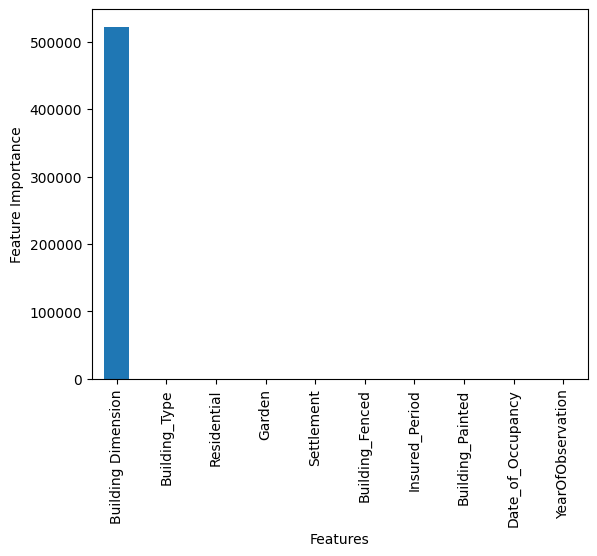

In [214]:
# plotting Chi_2 Scores on the bar graph
chi_values = pd.Series(chi2_scores[0],index = X.columns)
chi_values.sort_values(ascending=False, inplace= True)
chi_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Feature Importance')

Text(0, 0.5, 'p_scores')

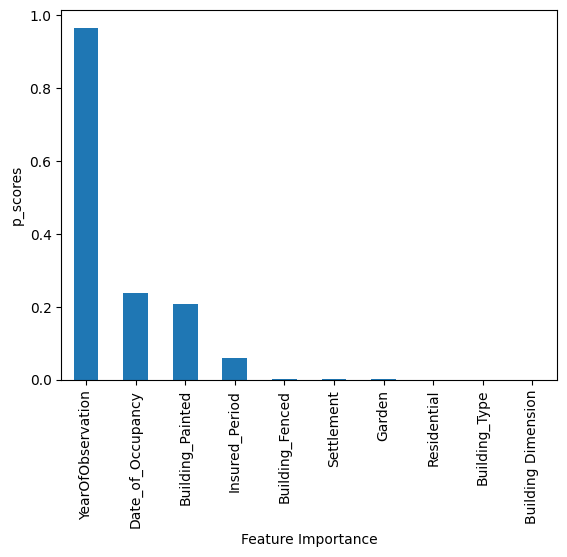

In [215]:
#Plotting using the p-values
p_values = pd.Series(chi2_scores[1],index = X.columns)
p_values.sort_values(ascending=False, inplace= True)
p_values.plot.bar()
plt.xlabel('Feature Importance')
plt.ylabel('p_scores')

 From the graph,Building dimension is the most important variable because they have a higher chi2 score and a lower p-values from the graphs above

In [216]:
chi_values

Building Dimension    521960.927725
Building_Type             36.456080
Residential               20.058078
Garden                     9.822983
Settlement                 9.768617
Building_Fenced            9.627780
Insured_Period             3.560031
Building_Painted           1.584964
Date_of_Occupancy          1.389534
YearOfObservation          0.001824
dtype: float64

**Splitting the dataset into training and testing**

In [218]:
#splitting the dataset
from sklearn.model_selection import train_test_split

# Assuming df1 is your DataFrame
features = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']
target = "Claim"

X = df1[features]
y = df1[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [220]:
X_train

array([[ 1.68333   ,  0.36173668,  1.52019165, ..., -0.56407555,
         1.945864  , -0.13677604],
       [ 0.96004486,  0.37325912, -0.6578118 , ...,  0.59556136,
        -0.19059546, -0.13677604],
       [-0.48652543,  0.37325912, -0.6578118 , ...,  1.10544062,
         0.87763427,  0.14963661],
       ...,
       [ 0.23675971,  0.37325912,  1.52019165, ...,  0.65422003,
         1.945864  , -1.74068689],
       [-1.20981057,  0.37325912,  1.52019165, ..., -0.75900284,
        -0.19059546, -0.13677604],
       [-1.20981057,  0.37325912,  1.52019165, ..., -1.07163928,
        -1.25882518, -0.42318869]])

In [221]:
X_test

array([[-1.20981057,  0.37325912, -0.6578118 , ..., -0.44856308,
        -0.19059546, -0.13677604],
       [-0.48652543,  0.37325912, -0.6578118 , ..., -0.8654909 ,
         0.87763427,  0.43604926],
       [-1.20981057, -1.5048997 ,  1.52019165, ...,  1.11717235,
         1.945864  ,  0.43604926],
       ...,
       [ 0.23675971,  0.37325912, -0.6578118 , ..., -0.69041731,
        -0.19059546,  1.09479836],
       [ 0.23675971,  0.37325912, -0.6578118 , ...,  0.84373268,
        -1.25882518,  0.66517938],
       [-1.20981057,  0.37325912, -0.6578118 , ..., -0.67146605,
        -0.19059546,  1.29528722]])

**Model Building**

KNN Model

In [222]:
from sklearn.neighbors import KNeighborsClassifier
# Create the K-nearest Neighbours Classifier and use the train dataset to train the model
#accuracy = np.zeros(20)
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#predicting the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Evaluating the K-nearest Neighbours model using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1098
           1       0.38      0.25      0.30       334

    accuracy                           0.73      1432
   macro avg       0.59      0.56      0.57      1432
weighted avg       0.70      0.73      0.71      1432



Accuracy is the overall correct predictions divided by the total number of predictions.
The overall accuracy is 0.73, meaning that the model correctly predicted the class for 73% of the instances.

**Tune hyperparameters for KNN Model**

In [223]:
grid_params = { 'n_neighbors' : [2,6,10,12,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [224]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [225]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [226]:
# find the best score
g_res.best_score_

0.777758427289856

In [227]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}

In [228]:
# use the best hyperparameters
g_res.best_params_
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [229]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [230]:
# Model Evaluation
#print('Training set accuracy: ', accuracy_score(y_train, y_pred))
print('Test set accuracy: ', accuracy_score(y_test, y_knn))
sc = accuracy_score(y_test, y_knn)

Test set accuracy:  0.7688547486033519


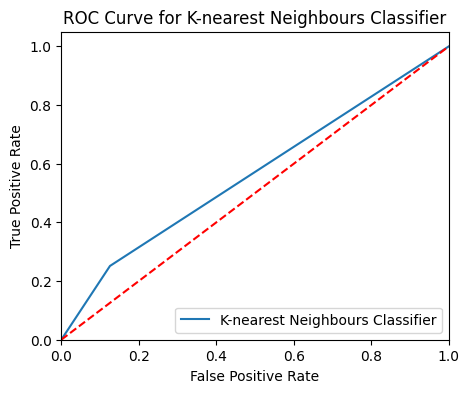

In [231]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_pred_= knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score_knn = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='K-nearest Neighbours Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for K-nearest Neighbours Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC is not very far from the diagonal line, this means the model not relatively a good one

**Naive Bayes**

In [232]:
# create the Naive Bayes' Classifier and use the train dataset to train the model
classifier=GaussianNB()
classifier.fit(X_train, y_train)

# predict the results of the model
y_predictnb=classifier.predict(X_test)
y_predict_proba = classifier.predict_proba(X_test)[:,1]

# Evaluating the model using classification report
print(classification_report(y_test,y_predictnb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1098
           1       0.48      0.35      0.40       334

    accuracy                           0.76      1432
   macro avg       0.65      0.62      0.63      1432
weighted avg       0.74      0.76      0.75      1432



Overall accuracy is 0.76, meaning that the model correctly predicts the class for about 76% of the instances.

**Tune hyparameters for Naive Bayes**

In [233]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [234]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [235]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

# Assuming X_train and y_train are your training data
Data_transformed = PowerTransformer().fit_transform(X_train)

# Create the Naive Bayes model
model_NB = GaussianNB()

# Define the parameter grid
params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create the GridSearchCV object
gs_NB = GridSearchCV(estimator=model_NB,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

# Fit the grid search to the data
gs_NB.fit(Data_transformed, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [236]:
gs_NB.best_params_

{'var_smoothing': 0.43287612810830584}

In [237]:
gs_NB.best_score_

0.7777009584632073

In [238]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

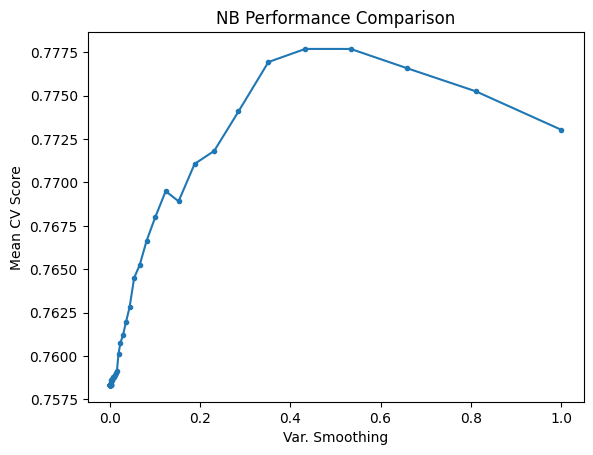

In [239]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [240]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

In [241]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_train,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7805516759776536


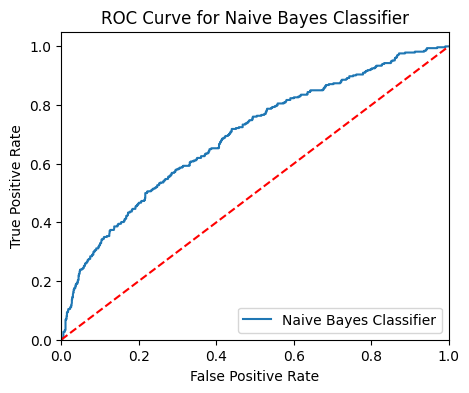

In [242]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_predictnb_proba)
nb_roc_auc2=roc_auc_score(y_test,classifier.predict(X_test))
plt.plot(fpr, tpr, label='Naive Bayes Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC is a bit far from the diagonal line, this means the model is than that of KNN

**Linear Regression model building**

In [243]:
#creating a model
from sklearn.linear_model import LinearRegression
# creating a object
model = LinearRegression()
#training the model
model.fit(X, y)
#using the training dataset for the prediction
pred = model.predict(X)
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
#plt.plot(X, pred, color = 'Black', marker = 'o')
#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , model.intercept_)
print("Slope :" , model.coef_)

Mean Squared Error :  0.15642165247898437
R-Squared : 0.11190386213358161
Y-intercept : 15.769650332048442
Slope : [-7.31012740e-03  1.50617893e-01  1.21455050e-02  1.35871411e-02
  7.74555714e-01 -8.63125528e-01  1.04176606e-01  1.17645573e-04
  4.74341059e-02 -6.40233514e-04]


The model's performance, as indicated by the R-squared value, is relatively low, suggesting that the linear regression model might not fully capture the underlying patterns in the data

**Tuning hyperparameters**

In [244]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [245]:
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [246]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [247]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [248]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [249]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.1592946570099467
Root Mean Squared Error (RMSE): 0.3991173474179576
R-squared (R2): 0.10928567254462418


**SVM Model building**

In [ ]:
#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a svm Classifier
support_vectorcf= svm.SVC(kernel='linear',probability=True,random_state = 0)
#Train the model using the training sets
support_vectorcf.fit(X_train, y_train)

In [ ]:
# predict the results of the model
y_predict_svm=support_vectorcf.predict(X_test)

In [77]:
# Evaluating the SVM model using classification report
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1098
           1       0.00      0.00      0.00       334

    accuracy                           0.77      1432
   macro avg       0.38      0.50      0.43      1432
weighted avg       0.59      0.77      0.67      1432



The model performs well in predicting class 0 with high precision and recall.
However, for class 1, the model has lower precision and recall, indicating challenges in correctly identifying instances of class 1.
The low F1-score for class 1 suggests an imbalance between precision and recall.
The overall accuracy is 77%, but it's crucial to consider the class-specific metrics, especially when dealing with imbalanced datasets.

In [78]:
# Evaluating the model's performance using a confusion matrix
cm_svm = confusion_matrix(y_test, y_predict_svm)
print(cm_svm)
accuracy_score(y_test, y_predict_svm)

[[1098    0]
 [ 334    0]]


0.7667597765363129

In [79]:
accuracy=accuracy_score(y_test, y_predict_svm)
accuracy

0.7667597765363129

In [80]:
# predict the results of the model
y_predict_svm = support_vectorcf.predict_proba(X_test)[:, 1]
# Creating instances (i.e. objects) of the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_svm)
roc_auc = auc(fpr, tpr)

<Figure size 500x400 with 0 Axes>

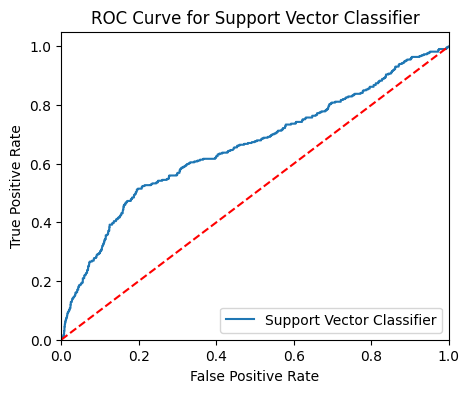

In [81]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
svm = SVC(probability=True)

# Train the model
svm.fit(X_train, y_train)

# Visualize the ROC curve
plt.figure(figsize=(5, 4))
# Use decision_function to get decision values
y_decision = svm.decision_function(X_test)

# Manually compute probabilities using decision values
y_pred_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
nb_roc_auc2=roc_auc_score(y_test,svm.predict(X_test))
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC is relativel good since is a bit far from the diagonal line

**Handling the Test dataset**

In [129]:
#loading the test dataset
df2 = pd.read_csv('/content/drive/MyDrive/dataset/test_data.csv')

In [130]:
#displaying the columns in the dataset
df2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [131]:
#displaying the first five rows
df2.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [132]:
#determining the dimension of the dataset
df2.shape

(3069, 13)

This shows that the test dataset has 3069 rows and 13 columns

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


This shows that out of the 13 columns, 3 columns have float datatype, 3 hae integer datatype and 7 columns have a string datatype.

In [134]:
df2.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [135]:
df2.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,3069,3069,3069,3065,3069,3069,3056
unique,3069,2,2,2,2,11,697
top,H11920,V,V,V,U,.,6083
freq,1,1684,2240,2240,2240,2240,113


In [136]:
#checking for missing values in the dataset
df2.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [137]:
#Handling the missing values using imputation since the dataset is small
df2 = df2
df2['Building Dimension']=df2['Building Dimension'].fillna(df2['Building Dimension'].median())
df2['Date_of_Occupancy']=df2['Date_of_Occupancy'].fillna(df2['Date_of_Occupancy'].median())
df2['Garden']=df2['Garden'].fillna(df2['Garden'].mode().iloc[0])
df2['Geo_Code']=df2['Geo_Code'].fillna(df2['Geo_Code'].mode().iloc[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3069 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3069 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   3069 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [138]:
columns_to_drop = ['NumberOfWindows','Geo_Code']
df2 = df2.drop(columns=columns_to_drop, axis=1)

In [139]:
df2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

**Label Encoding**

In [154]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement"]
for column in categorical_columns:
  df2[column] = label_encoder.fit_transform(df2[column])

In [141]:
df2.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0
1,H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0
3,H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0
4,H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0


 **Making Model predictions**

In [142]:
df2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

In [143]:
features1 = ["Building Dimension","Insured_Period","Residential","Building_Fenced","Garden","Settlement","Building_Type","YearOfObservation","Date_of_Occupancy","Building_Painted"]
X_pred1 =df2[features1]

In [144]:
X_pred1.head()

,Building Dimension,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building_Type,YearOfObservation,Date_of_Occupancy,Building_Painted
0,300.0,1.000000,0,0,0,0,1,2013,1960.0,1
1,300.0,0.997268,0,0,0,0,1,2016,1960.0,1
2,790.0,0.369863,0,1,1,1,1,2013,1960.0,1
3,1405.0,1.000000,0,0,0,0,1,2014,2004.0,1
4,1405.0,1.000000,0,0,0,0,1,2016,2004.0,1


**Predictions for SVM model**

In [176]:
# Make predictions using the trained SVM model
predictions = support_vectorcf.predict(scaled_X_pred1)

# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})

# Assuming df2 has a column named 'Customer ID'
customer_ids = df2["Customer Id"]

# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})

# Print the predictions
print(output_df)

     Customer ID  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]


In [ ]:
# Save the predictions to a CSV file
output_df.to_csv('SVM_predictions_output.csv', index=False)

**Predictions for KNN model**

In [158]:
# Make predictions using the trained SVM model
predictions = knn.predict(scaled_X_pred1)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = df2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)



     Customer ID  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]


In [159]:
# Save the predictions to a CSV file
output_df.to_csv('KNN_predictions_output.csv', index=False)

**Predictions for Naive Bayes Model**

In [160]:
# Make predictions using the trained SVM model
predictions = classifier.predict(scaled_X_pred1)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = df2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)


     Customer ID  Predictions
0         H11920            1
1         H11921            1
2          H9805            1
3          H7493            1
4          H7494            1
...          ...          ...
3064      H11583            1
3065      H11720            1
3066      H11721            1
3067      H12408            1
3068       H9021            1

[3069 rows x 2 columns]


In [162]:
# Save the predictions to a CSV file
output_df.to_csv('Naive Bayes_predictions_output.csv', index=False)

**Predictions for Linear Regression model**

In [163]:
# Make predictions using the trained SVM model
predictions = model.predict(scaled_X_pred1)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = df2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)


     Customer ID  Predictions
0         H11920    24.659563
1         H11921    24.634090
2          H9805    21.311319
3          H7493    23.933844
4          H7494    23.933845
...          ...          ...
3064      H11583    24.327337
3065      H11720    24.223730
3066      H11721    24.306251
3067      H12408    23.847445
3068       H9021    24.227415

[3069 rows x 2 columns]


In [165]:
# Save the predictions to a CSV file
output_df.to_csv('Linear Regression_predictions_output.csv', index=False)

In [166]:
#Scores of the different models
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Linear Regression', 'KNN','Naive Bayes'],
   'Score': [accuracy, r2 , sc,accuracy_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,0.779853
2,KNN,0.768855
0,Support Vector Machines,0.729050
1,Linear Regression,0.105355
